# Gene expression

**Import**

In [1]:
# from second tutorial notebook (Part02)
import scanpy as sc
import pandas as pd
import scvelo as scv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import ipywidgets as widgets

# others
import re
import os

# first tutorial
import diffxpy.api as dxpy
import plotly.express as px

In [5]:
adata_input = '/home/astridkd/testis_singlecell/Workspaces/adahl/birc-project-akd/results/cluster_results/BON/cluster_adata.h5ad'

In [6]:
adata = sc.read(adata_input)

In [7]:
adata

AnnData object with n_obs × n_vars = 11852 × 27335
    obs: 'DATASET', 'batch', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'prop_unspl', 'prop_spl', 'perc_MALAT1', 'n_genes', 'doublet_scores', 'predicted_doublets', 'n_counts', 'SpermatogoniaA_score', 'SpermatogoniaB_score', 'SpermatocytesI_score', 'SpermatocytesII_score', 'Round.Spt_score', 'Elong.Spt_score', 'Sertoli_score', 'Macroph_score', 'Leydig_score', 'Endothelial_score', 'Myoid_score', 'Pericyte_score', 'leiden_R1', 'leiden_R.5', 'leiden_R.25', 'leiden_R.1', 'spermatogenesis_types'
    var: 'gene_ids', 'feature_types', 'chromosome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'DATASET_colors', 'hvg', 'leiden', 'leiden_R.1_colors', 'leiden_R.25_colors', 'leiden_R.5_colors', 'leiden_R1_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'spermatogenesis_types_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_counts', 'scaled_counts', 

In [18]:
adata.obs['spermatogenesis_types']

SN219_AAACCTGAGAAAGTGG      SpermatocytesI
SN219_AAACCTGAGACCTTTG      SpermatocytesI
SN219_AAACCTGAGATCCCAT    Elong_Spermatids
SN219_AAACCTGAGCGGCTTC    Round_Spermatids
SN219_AAACCTGAGGCGCTCT      SpermatogoniaB
                                ...       
SN224_TTTGTCACATCCTTGC      SpermatocytesI
SN224_TTTGTCAGTCTAGAGG    Round_Spermatids
SN224_TTTGTCAGTGAGTGAC    Elong_Spermatids
SN224_TTTGTCATCCGCAGTG      SpermatogoniaA
SN224_TTTGTCATCGGAATCT      SpermatocytesI
Name: spermatogenesis_types, Length: 11852, dtype: category
Categories (8, object): ['5', 'Elong_Spermatids', 'Pericytes', 'Round_Spermatids', 'SpermatocytesI', 'SpermatocytesII', 'SpermatogoniaA', 'SpermatogoniaB']

In [16]:
LINC = ['LINC' in i for i in adata.var_names] 

In [17]:
adata[:,LINC].var_names

Index(['LINC01409', 'LINC00115', 'LINC01128', 'LINC01786', 'LINC01134',
       'LINC01346', 'LINC01345', 'LINC02780', 'LINC01777', 'LINC01646',
       ...
       'LINC01284', 'LINC01278', 'LINC00630', 'LINC01285', 'LINC00629',
       'LINC00632', 'LINC00893', 'LINC00850', 'LINC00894', 'LINC00278'],
      dtype='object', length=1559)

In [22]:
LNC_gene = ['LINC00917']

In [23]:
LNC_genes = adata[:,LINC].var_names

In [24]:
LNC_genes

Index(['LINC01409', 'LINC00115', 'LINC01128', 'LINC01786', 'LINC01134',
       'LINC01346', 'LINC01345', 'LINC02780', 'LINC01777', 'LINC01646',
       ...
       'LINC01284', 'LINC01278', 'LINC00630', 'LINC01285', 'LINC00629',
       'LINC00632', 'LINC00893', 'LINC00850', 'LINC00894', 'LINC00278'],
      dtype='object', length=1559)

In [26]:
genes_to_plot = LNC_genes[:5]

In [27]:
genes_to_plot 

Index(['LINC01409', 'LINC00115', 'LINC01128', 'LINC01786', 'LINC01134'], dtype='object')

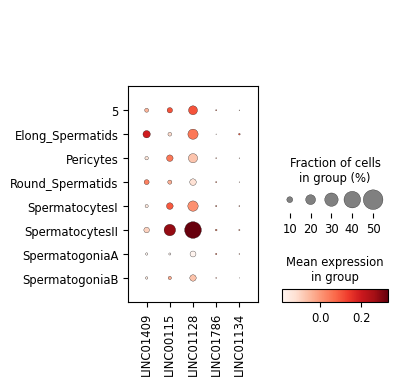

In [28]:
sc.pl.dotplot(adata, genes_to_plot, groupby='spermatogenesis_types')

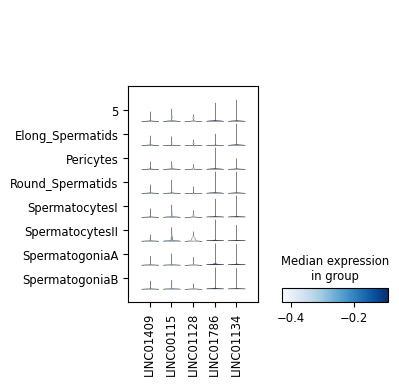

In [30]:
sc.pl.stacked_violin(adata, genes_to_plot, groupby='spermatogenesis_types', rotation=10);

In [36]:
plt.rcParams['figure.figsize'] = (4.5, 3)
sc.pl.violin(pbmc, ['n_genes', 'percent_mito'], groupby='clusters', stripplot=False, inner='box')  # use stripplot=False to remove the internal dots, inner='box' adds a boxplot inside violins

NameError: name 'pbmc' is not defined